In [110]:
from collections import defaultdict
from itertools import groupby
import operator
import os
import re

import hdbscan
import numpy as np
import pandas as pd
import pickle
import random
import sparse
#import tensorly as tl
#import tensorly.decomposition as decomp
import sktensor
import umap
import urllib3
#import wget

import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import logging
logging.basicConfig(level=logging.DEBUG, 
                    format='%(msecs)d %(levelname)-8s [%(lineno)d] %(message)s')

if not os.path.exists('cp_orth.py'):
    wget.download('http://web.stanford.edu/~vsharan/cp_orth.py')
from cp_orth import orth_als

30 DEBUG    [211] Loaded backend module://ipykernel.pylab.backend_inline version unknown.


Populating the interactive namespace from numpy and matplotlib


/home/makrai/tool/python/miniconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [148]:
ktensor, fit, n_iterations, exectimes = pickle.load(open(
    '/mnt/store/home/makrai/project/verb-tensor/sktensor/decomp_2048_10.pkl', mode='rb'))

In [29]:
def visu(metric='euclidean'):
    mapping = umap.UMAP(n_components=2, metric=metric)
    logging.info('UMAP...')
    embed2 = mapping.fit_transform(ktensor.U[1])
    logging.info('HDBScan...')
    plt.scatter(*embed2.T, s=1)
    return embed2

572 INFO     [3] UMAP...
982 INFO     [5] HDBScan...
996 DEBUG    [2515] update_title_pos
30 DEBUG    [2515] update_title_pos
96 DEBUG    [2515] update_title_pos
125 DEBUG    [2515] update_title_pos
138 DEBUG    [2515] update_title_pos


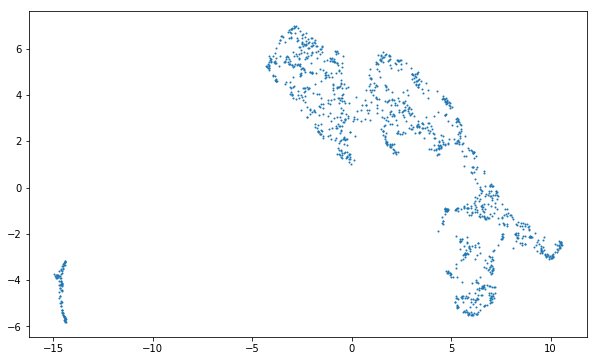

In [156]:
embed2 = visu()

`metric='cosine'` and `'correlation'` exceed recursion limit

In [152]:
clusser = hdbscan.HDBSCAN()#metric=)
# The implementation defaults min_samples to whatever min_cluster_size is set to

In [157]:
labels = clusser.fit_predict(ktensor.U[1])

65 DEBUG    [2515] update_title_pos
125 DEBUG    [2515] update_title_pos
211 DEBUG    [2515] update_title_pos
234 DEBUG    [2515] update_title_pos
247 DEBUG    [2515] update_title_pos


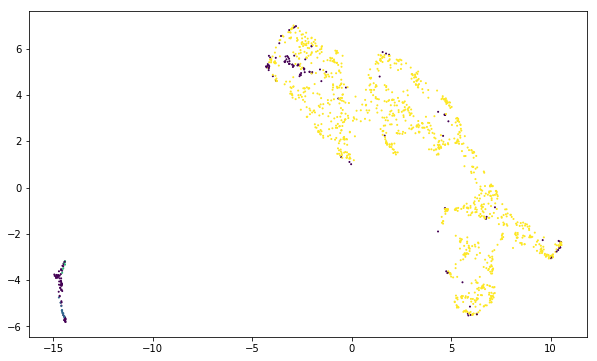

In [158]:
plt.scatter(embed2.T[0], embed2.T[1], c=labels, s=1)

In [160]:
tensor, index = pickle.load(open('/mnt/store/home/makrai/project/verb-tensor/sktensor/tensor_2048.pkl', mode='rb'))

In [162]:
def show_clustering(
        labels, embed_name=None, preproc=None, n_clust_show=30, 
        print_samples=True, sample_size=5, show_size_of=60, sort_sizes='descending',
        min_size=3, plot='scatter', average=False):
    """
    sort_sizes in ['ascending', 'descending', 'rand']
    """
    clus_len_l = [(key, len(list(group))) for key, group in groupby(sorted(labels))]
    if sort_sizes is not 'rand':
        clus_len_l = sorted(clus_len_l, key=operator.itemgetter(1), reverse=sort_sizes=='descending')
    clusters, lens = zip(*list(clus_len_l))
    n_clusters = len(clus_len_l)
    #entropy_ = stats.entropy(lens)
    header = '{} clusters, entropy={:.2}, sizes: {}{}'.format(
        n_clusters, 'entropy_', ' '.join(map(str, lens[:show_size_of])), 
        '..' if n_clusters>show_size_of else '')
    print(header)
    verbs = np.array(list(index[1].keys()))
    logging.info(verbs[:10])
    for cluster_i, clus_len in zip(clusters[:n_clust_show+1], lens):
        if clus_len < min_size or cluster_i == -1:
            continue
        clus_siz = np.sum(labels==cluster_i)
        print('\n{} verbs. id: {}\n'.format(clus_siz, int(cluster_i)))
        #cluster.sample(n=min(sample_size, clus_siz)
        print(verbs[labels==cluster_i])
    print('\n{}'.format(header))

In [163]:
show_clustering(labels)

998 INFO     [19] ['NULL' 'van' 'lesz' 'mond' 'tud' 'tesz' 'tart' 'lát' 'vesz' 'kerül']


4 clusters, entropy=en, sizes: 1102 169 14 8

1102 verbs. id: 2

['kiderül' 'okoz' 'lép' ... 'visszalép' 'felügyel' 'megnyugszik']

14 verbs. id: 0

['hoz' 'hisz' 'vár' 'érez' 'talál' 'ért' 'hall' 'csinál' 'keres' 'akar'
 'hallik' 'kérdez' 'hagy' 'olvas']

8 verbs. id: 1

['említ' 'bizonyít' 'kimond' 'idéz' 'elhisz' 'megír' 'kitalál' 'megtanul']

4 clusters, entropy=en, sizes: 1102 169 14 8
